#### TF.SnoqualmieData.BoundaryLayerObs
Plots of boundary layer relevant variables @ Snoqualmie

In [5]:
# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xray
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# Solargeometry
import solargeo

/Users/karllapo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
#### Directory Lists
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

dirProj = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/'           # Project directory
dirPrint = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/Graphics'  # Directory for printing figures
dirData = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'    # Processed data directory

## Define Functions

### Bulk Richardson

In [7]:
def bulkRichardson(# input
                   airTemp,            # air temperature (K)
                   sfcTemp,            # surface temperature (K)
                   windspd,            # wind speed (m s-1)
                   mHeight,            # measurement height (m)
                   computeDerivative,  # flag to compute the derivative
                     ):

# --------------------------------------------------------------------------------------------------------------------
    ########
    # Local variables
    gravity = 9.81
    T_grad = airTemp - sfcTemp
    T_mean = 0.5*(airTemp + sfcTemp)
    RiMult = (gravity*mHeight)/(windspd*windspd)
    # compute the Richardson number
    RiBulk = (T_grad/T_mean) * RiMult
    
    ########
    # compute the derivative in the Richardson number
    if computeDerivative:
        dRiBulk_dAirTemp =  RiMult/T_mean - RiMult*T_grad/(0.5*((airTemp + sfcTemp)**2.))
        dRiBulk_dSfcTemp = -RiMult/T_mean - RiMult*T_grad/(0.5*((airTemp + sfcTemp)**2.))
    else:
        dRiBulk_dAirTemp = 1.
        dRiBulk_dSfcTemp = 1.

    return (RiBulk,                     # bulk Richardson number (-)
            dRiBulk_dAirTemp,           # derivative in the bulk Richardson number w.r.t. air temperature (K-1)
            dRiBulk_dSfcTemp)           # derivative in the bulk Richardson number w.r.t. surface temperature (K-1)

## Read Supporting Data - Time Series

In [8]:
## Read the formatted supporting snoqualmie obs
os.chdir(dirData)
support = xray.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')
# Need to move support from being left labeled to right labeled
# support = support.resample(how='mean',freq='30Min',dim='time',label='right')

# Temperature array
tarray = xray.open_dataset('SnoqualmieObs.SupportData.TArray.Spring2015.nc')

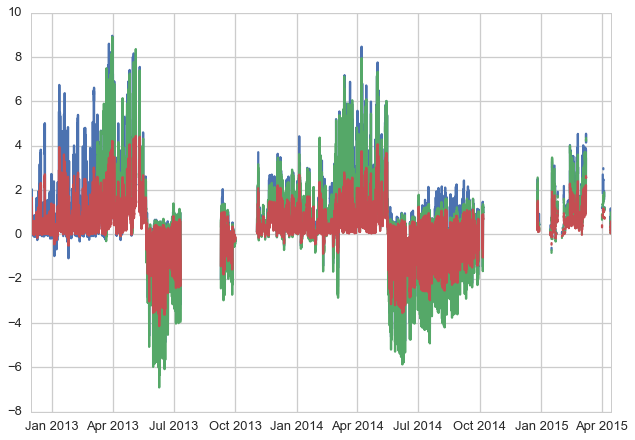

In [9]:
## Plot tempearture gradients by height
fig, ax = plt.subplots(1,1)
ax.plot(support.time,(support.T4-support.Tsrf)/(4-support.Snowdepth))
ax.plot(support.time,(support.T3-support.Tsrf)/(3.82-support.Snowdepth))
ax.plot(support.time,(support.T6-support.Tsrf)/(6.35-support.Snowdepth))

## Describe snow presence
When does snow disappear in 2015?

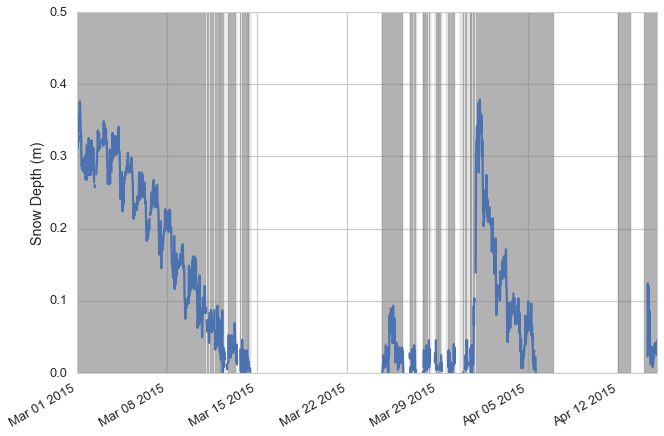

In [10]:
d1 = datetime(2015,3,1)
d2 = datetime(2015,4,15)
fig,ax = plt.subplots(1,1)

ax.plot(support.time,support.Snowdepth)
ax.fill_between(support.time.values,0,1,where=support.SP,color='grey',alpha=.6)


ax.set_ylabel('Snow Depth (m)')
ax.set_xlim(d1,d2)
ax.set_ylim(0,.5)
fig.autofmt_xdate()

## Temperature/RH/Wind Array

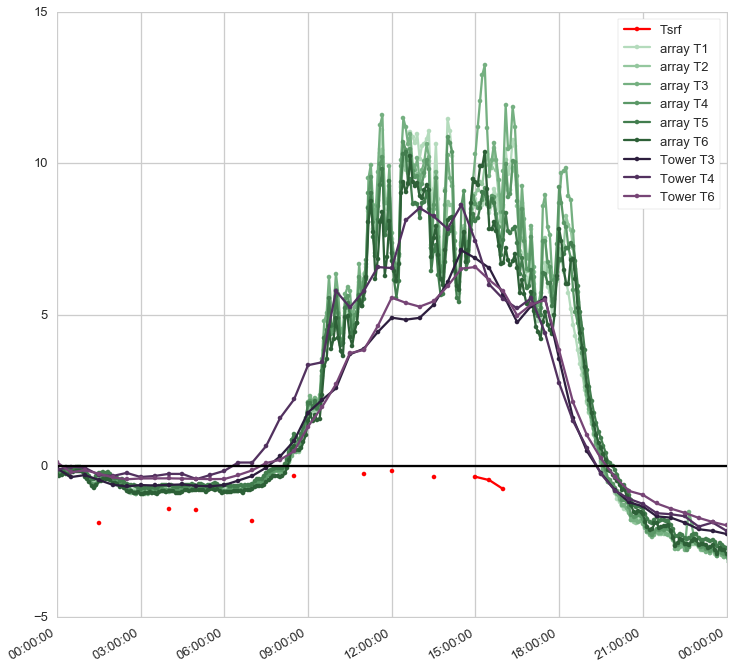

In [11]:
## Plot temperature, RH, and wind by height
fig, ax = plt.subplots(1,1,figsize=(12,12))

## Surface temperature
ax.plot(support.time,support.Tsrf,label='Tsrf',color='r',marker='.')

## Temperature Array
pal2 = sns.cubehelix_palette(6, start=2, rot=0, dark=.3, light=.8)
vars_to_plot = ['T1','T2','T3','T4','T5','T6']
for n,v in enumerate(vars_to_plot):
    ax.plot(tarray.time,tarray[v],label='array '+v,marker='.',color=pal2[n])
    
## Main tower observations
pal1 = sns.cubehelix_palette(8,reverse=True)
vars_to_plot = ['T3','T4','T6']
for n,v in enumerate(vars_to_plot):
    ax.plot(support.time.values,support[v],label='Tower '+v,marker='.',color=pal1[n])

# ax.fill_between(support.time.values,0,100,where=support.SP,color='grey',alpha=.6)
       
# Format
d1 = datetime(2015,4,4)
d2 = datetime(2015,4,5)
ax.set_xlim(d1,d2)
ax.set_ylim(-5,15)
ax.legend(frameon=True)
ax.plot(np.array([d1,d2]),np.array([0,0]),'k')
fig.autofmt_xdate()

In [12]:
## TArray to half hour values
tarray_hh = tarray.resample(dim='time',how='mean',freq='30Min')

In [13]:
# Date limits for plots
d1 = datetime(2015,3,1)
d2 = datetime(2015,4,30)

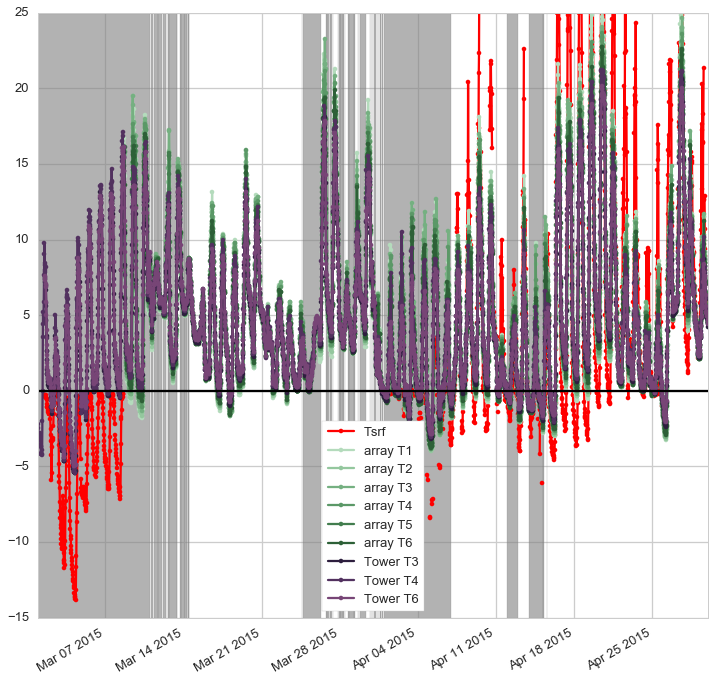

In [14]:
## Plot temperature, RH, and wind by height
fig, ax = plt.subplots(1,1,figsize=(12,12))

## Surface temperature
ax.plot(support.time,support.Tsrf,label='Tsrf',color='r',marker='.')

## Temperature Array
pal2 = sns.cubehelix_palette(6, start=2, rot=0, dark=.3, light=.8)
vars_to_plot = ['T1','T2','T3','T4','T5','T6']
for n,v in enumerate(vars_to_plot):
    ax.plot(tarray_hh.time,tarray_hh[v],label='array '+v,marker='.',color=pal2[n])
    
## Main tower observations
pal1 = sns.cubehelix_palette(8,reverse=True)
vars_to_plot = ['T3','T4','T6']
for n,v in enumerate(vars_to_plot):
    ax.plot(support.time.values,support[v],label='Tower '+v,marker='.',color=pal1[n])

ax.fill_between(support.time.values,-100,100,where=support.SP,color='grey',alpha=.6)
       
# Format

ax.set_xlim(d1,d2)
ax.set_ylim(-15,25)
ax.legend(frameon=True,loc='best')
ax.plot(np.array([d1,d2]),np.array([0,0]),'k')
fig.autofmt_xdate()

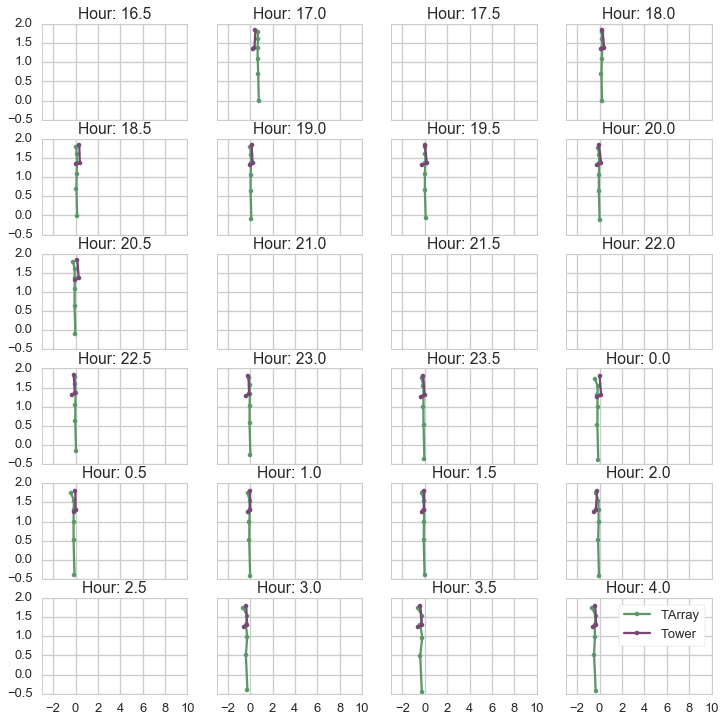

In [15]:
## Temperature gradients with height
fig, axes = plt.subplots(6,4,figsize=(12,12),sharex='col',sharey='row')
axes = axes.flatten()
d1 = datetime(2015,3,31,16,30,0)
d2 = d1+timedelta(minutes=30)*23

zTower = np.array((3.82,4.0,6.35))
zArray = np.array((1,2,3,4,5,6))

timeSpan = support.time.sel(time=slice(d1,d2))

for n,t in enumerate(timeSpan):
    ax = axes[n]
    ## Temperature Array
    pal2 = sns.cubehelix_palette(6, start=2, rot=0, dark=.3, light=.8)
    vars_to_plot = ['T1','T2','T3','T4','T5','T6']
    vals = [tarray[v].sel(time=t).values for v in vars_to_plot]    
    ax.plot(vals,np.log(zArray-support.Snowdepth.sel(time=t).values),\
            label='TArray',marker='.',color=pal2[3])
    
    ## Main tower observations
    pal1 = sns.cubehelix_palette(8,reverse=True)
    vars_to_plot = ['T3','T4','T6']
    vals = [support[v].sel(time=t).values for v in vars_to_plot]    
    ax.plot(vals,np.log(zTower-support.Snowdepth.sel(time=t).values),\
            label='Tower',marker='.',color=pal1[2])

    ax.set_title('Hour: '+str(t['time.hour'].values+t['time.minute'].values/60.))
    ax.set_xlim(-3,10)
        
# Format
ax.legend(frameon=True,loc='best')


### Composites of temperature with height

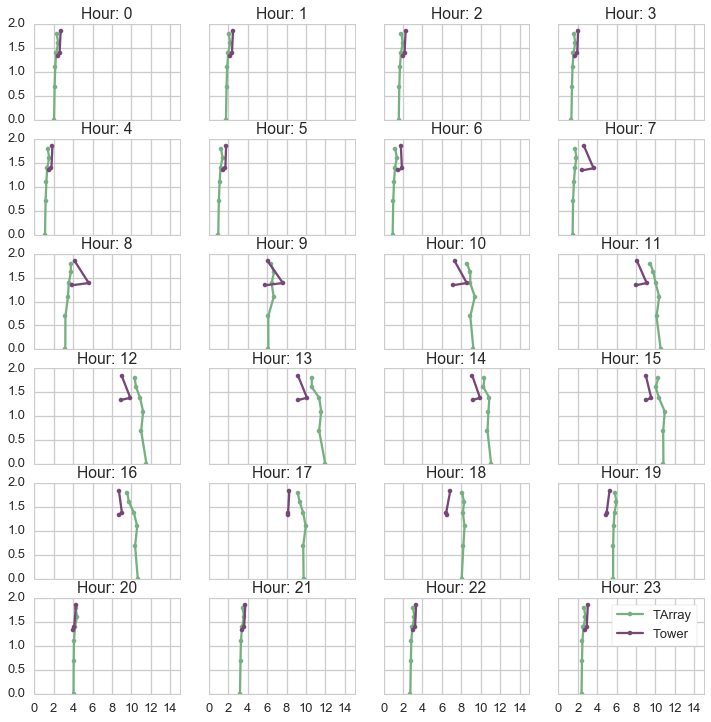

In [16]:
## Temperature gradients with height
fig, axes = plt.subplots(6,4,figsize=(12,12),sharex='col',sharey='row')
axes = axes.flatten()
pal1 = sns.cubehelix_palette(8,reverse=True)
pal2 = sns.cubehelix_palette(6, start=2, rot=0, dark=.3, light=.8)

zTower = np.array((3.82,4.0,6.35))
zArray = np.array((1,2,3,4,5,6))
hour = np.arange(0,24)

for n,h in enumerate(hour):
    ax = axes[n]
    ## Temperature Array
    vars_to_plot = ['T1','T2','T3','T4','T5','T6']
    vals = [tarray[v].sel(time=tarray['time.hour'] == h).mean(dim='time') for v in vars_to_plot]    
    ax.plot(vals,np.log(zArray),\
            label='TArray',marker='.',color=pal2[2])
    
    ## Main tower observations
    vars_to_plot = ['T3','T4','T6']
    vals = [support.reindex_like(tarray_hh)[v].sel(time=tarray_hh['time.hour'] == h).mean(dim='time') 
                           for v in vars_to_plot]    
    ax.plot(vals,np.log(zTower),\
            label='Tower',marker='.',color=pal1[2])

    ax.set_title('Hour: '+str(h))
    ax.set_xlim(0,15)
        
# Format
ax.legend(frameon=True,loc='best')


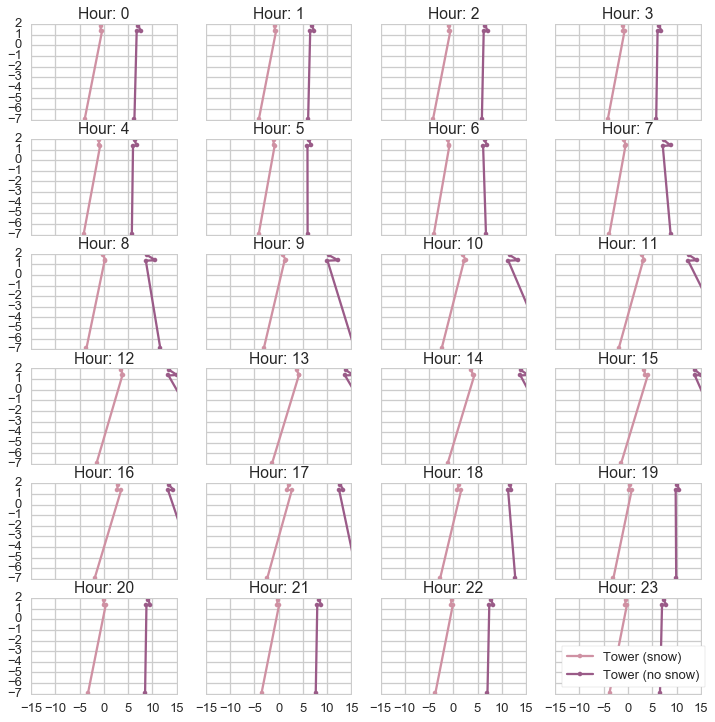

In [17]:
## Temperature gradients with height
fig, axes = plt.subplots(6,4,figsize=(12,12),sharex='col',sharey='row')
axes = axes.flatten()
pal1 = sns.cubehelix_palette(8)

zTower = np.array((0.001,3.82,4.0,6.35))
hour = np.arange(0,24)

for n,h in enumerate(hour):
    ax = axes[n]
    
    ## Main tower observations
    vars_to_plot = ['Tsrf','T3','T4','T6']
    vals = [support[v].where(support.SP==1).sel(time=support['time.hour'] == h).mean(dim='time')
                           for v in vars_to_plot]    
    ax.plot(vals,np.log(zTower),\
            label='Tower (snow)',marker='.',color=pal1[2])

    vals = [support[v].where(support.SP==0).sel(time=support['time.hour'] == h).mean(dim='time')
                           for v in vars_to_plot]    
    ax.plot(vals,np.log(zTower),\
            label='Tower (no snow)',marker='.',color=pal1[4])
    
    ax.set_title('Hour: '+str(h))
    ax.set_xlim(-15,15)
        
# Format
ax.legend(frameon=True,loc='best')

## Eddy Covariance

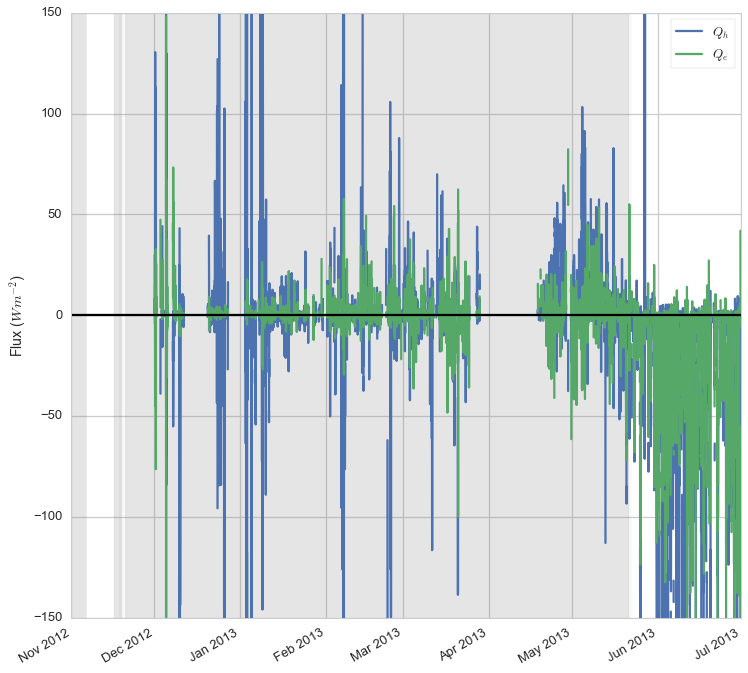

In [18]:
## What do the eddy-covariance observations look like?
d1 = datetime(2012,11,1)
d2 = datetime(2013,7,1)
fig, ax = plt.subplots(1,1,figsize=(12,12))

## Main tower flux observations
ax.plot(support.time,support.SensFlux,label='$Q_h$')
ax.plot(support.time,support.LatFlux,label='$Q_e$')

ax.fill_between(support.time.values,-1000,1000,where=support.SP,color='grey',alpha=.2)
       
# Format
ax.set_xlim(d1,d2)
ax.set_ylim(-150,150)
ax.set_ylabel('Flux ($Wm^{-2}$)')
ax.legend(frameon=True,loc='best')
ax.plot(np.array([d1,d2]),np.array([0,0]),'k')
fig.autofmt_xdate()

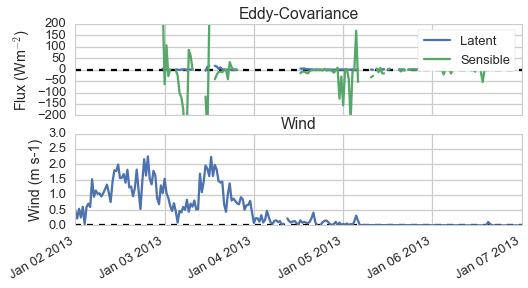

In [19]:
## Shorter time period -- Snoqualmie eddy-covariance
d1 = datetime(2013,1,2)
d2 = datetime(2013,1,7)

#########
# Sensible/Latent
fig,axes = plt.subplots(2,1,figsize=(8,4),sharex=True)
axes = axes.flatten()

ax = axes[0]
ax.plot([d1,d2],[0,0],'k--')
ax.plot(support.time.values,support.LatFlux,label='Latent')
ax.plot(support.time.values,support.SensFlux,label='Sensible')
ax.set_ylabel('Flux (Wm$^{-2}$)')
ax.set_ylim(-200,200)
ax.set_xlim(d1,d2)
ax.legend(loc='upper right',frameon=True)
ax.set_title('Eddy-Covariance')
fig.autofmt_xdate()

########
# Wind
# fig,axes = plt.subplots(1,1,figsize=(8,4))

ax = axes[1]
ax.plot([d1,d2],[0,0],'k--')
ax.plot(support.time.values,support.WIND)
ax.set_xlim(d1,d2)
ax.set_ylim(0,3)
ax.set_title('Wind')
ax.set_ylabel('Wind (m s-1)')
fig.autofmt_xdate()


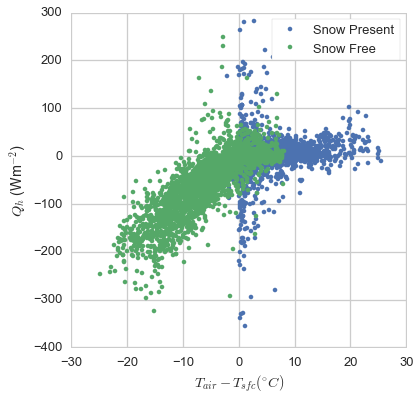

In [20]:
#########
# Sensible vs Temp gradient
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot( (support.T6-support.Tsrf).where(support.SP==1),support.SensFlux.where(support.SP==1),\
         '.',label='Snow Present')
ax.plot( (support.T6-support.Tsrf).where(support.SP==0),support.SensFlux.where(support.SP==0),\
         '.',label='Snow Free')
ax.legend(frameon=True)
ax.set_ylabel('$Q_h$ (Wm$^{-2}$)')
ax.set_xlabel('$T_{air}-T_{sfc} (^{\circ}C)$')

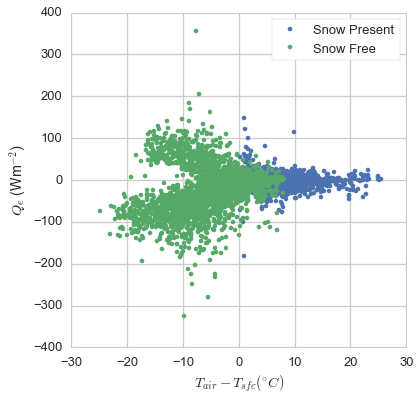

In [21]:
########
# Latent vs Temp gradient
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot( (support.T6-support.Tsrf).where(support.SP==1),support.LatFlux.where(support.SP==1),\
         '.',label='Snow Present')
ax.plot( (support.T6-support.Tsrf).where(support.SP==0),support.LatFlux.where(support.SP==0),\
         '.',label='Snow Free')
ax.legend(frameon=True)
ax.set_ylabel('$Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('$T_{air}-T_{sfc} (^{\circ}C)$')

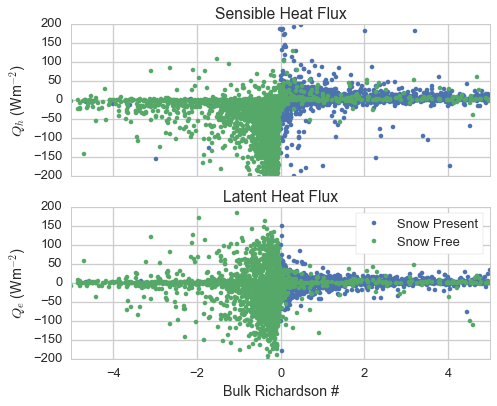

In [22]:
#########
# Turbulence vs Bulk Richardson
RiSP = bulkRichardson(support.T6.where(support.SP == 1)+273.15,
                    support.Tsrf.where(support.SP == 1)+273.15,
                    support.WIND.where(support.SP == 1),
                    6.-support.Snowdepth.where(support.SP == 1),
                    False)
RiFree = bulkRichardson(support.T6.where(support.SP == 0)+273.15,
                    support.Tsrf.where(support.SP == 0)+273.15,
                    support.WIND.where(support.SP == 0),
                    6.-support.Snowdepth.where(support.SP == 0),
                    False)
fig,axes = plt.subplots(2,1,figsize=(7.5,6),sharex=True)

ax = axes[0]
ax.plot( RiSP[0],support.SensFlux.where(support.SP==1),\
         '.',label='Snow Present')
ax.plot( RiFree[0],support.SensFlux.where(support.SP==0),\
         '.',label='Snow Free')
ax.set_xlim(-5,5)
ax.set_ylim(-200,200)
ax.set_ylabel('$Q_h$ (Wm$^{-2}$)')
ax.set_title('Sensible Heat Flux')

ax = axes[1]
ax.plot( RiSP[0],support.LatFlux.where(support.SP==1),\
         '.',label='Snow Present')
ax.plot( RiFree[0],support.LatFlux.where(support.SP==0),\
         '.',label='Snow Free')
ax.set_xlim(-5,5)
ax.set_ylim(-200,200)
ax.set_xlabel('Bulk Richardson #')
ax.set_ylabel('$Q_e$ (Wm$^{-2}$)')
ax.legend(frameon=True)
ax.set_title('Latent Heat Flux')

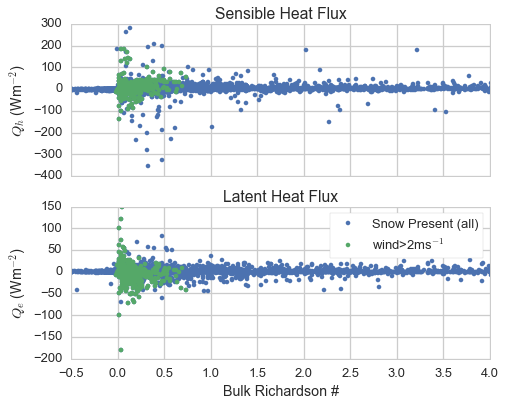

In [23]:
#########
# Turbulence vs Bulk Richardson
Ri = bulkRichardson(support.T6+273.15,
                    support.Tsrf+273.15,
                    support.WIND,
                    6.-support.Snowdepth,
                    False)
ind = np.nonzero ( (support.SP == 1).values &\
                  (support.WIND > 2).values & \
                  (~(np.isnan(support.SensFlux)).values |\
                  ~(np.isnan(support.LatFlux)).values)
                  )
indSP = np.nonzero ( (support.SP == 1).values)

fig,axes = plt.subplots(2,1,figsize=(7.5,6),sharex=True)

ax = axes[0]
ax.plot( RiSP[0][indSP],support.SensFlux[indSP],\
         '.',label='Snow Present (all)')
ax.plot( RiSP[0][ind],support.SensFlux[ind],\
         '.',label='wind>2ms-1')
ax.set_xlim(-.5,4)
# ax.set_ylim(-150,150)
ax.set_ylabel('$Q_h$ (Wm$^{-2}$)')
ax.set_title('Sensible Heat Flux')

ax = axes[1]
ax.plot( RiSP[0][indSP],support.LatFlux[indSP],\
         '.',label='Snow Present (all)')
ax.plot( RiSP[0][ind],support.LatFlux[ind],\
         '.',label='wind>2ms$^{-1}$')
ax.set_xlim(-.5,4)
# ax.set_ylim(-150,150)
ax.set_xlabel('Bulk Richardson #')
ax.set_ylabel('$Q_e$ (Wm$^{-2}$)')
ax.legend(frameon=True)
ax.set_title('Latent Heat Flux')

(-0.1, 4)

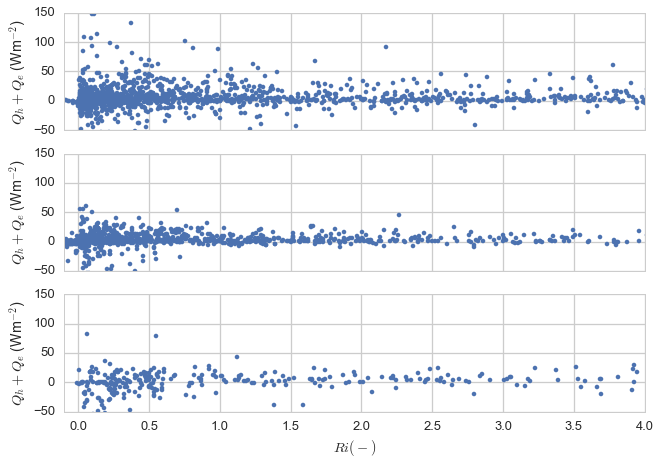

In [24]:
########
# Turbulence vs Richardson Number -- By year
fig,axes = plt.subplots(3,1,sharex=True)
Qmax = 150
Qmin = -50
RiMax = 4
RiMin = -.1

ax = axes[0]
d1 = datetime(2012,10,1)
d2 = datetime(2013,9,30)
Ri = bulkRichardson(support.T6.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.Tsrf.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.WIND.where(support.SP == 1).sel(time=slice(d1,d2)),
                    6.-support.Snowdepth.where(support.SP == 1).sel(time=slice(d1,d2)),
                    False)
ax.plot(Ri[0],(support.LatFlux+support.SensFlux).where(support.SP == 1).sel(time=slice(d1,d2)),'.')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)

ax = axes[1]
d1 = datetime(2013,10,1)
d2 = datetime(2014,9,30)
Ri = bulkRichardson(support.T6.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.Tsrf.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.WIND.where(support.SP == 1).sel(time=slice(d1,d2)),
                    6.-support.Snowdepth.where(support.SP == 1).sel(time=slice(d1,d2)),
                    False)
ax.plot(Ri[0],(support.LatFlux+support.SensFlux).where(support.SP == 1).sel(time=slice(d1,d2)),'.')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)

ax = axes[2]
d1 = datetime(2014,10,1)
d2 = datetime(2015,9,30)
Ri = bulkRichardson(support.T6.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.Tsrf.where(support.SP == 1).sel(time=slice(d1,d2))+273.15,
                    support.WIND.where(support.SP == 1).sel(time=slice(d1,d2)),
                    6.-support.Snowdepth.where(support.SP == 1).sel(time=slice(d1,d2)),
                    False)
ax.plot(Ri[0],(support.LatFlux+support.SensFlux).where(support.SP == 1).sel(time=slice(d1,d2)),'.')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('$Ri (-)$')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)

(-0.1, 4)

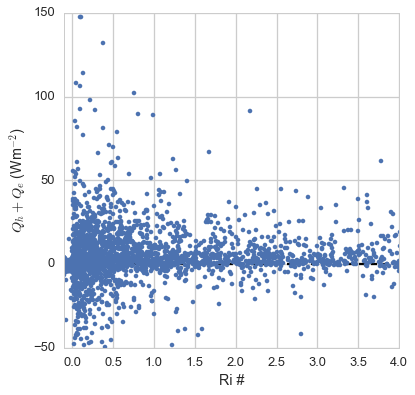

In [25]:
#########
# Net Turbulence vs Bulk Richardson -- All years
fig,axes = plt.subplots(1,1,figsize=(6,6))

ax = axes
Ri = bulkRichardson(support.T6.where(support.SP == 1)+273.15,
                    support.Tsrf.where(support.SP == 1)+273.15,
                    support.WIND.where(support.SP == 1),
                    6.-support.Snowdepth.where(support.SP == 1),
                    False)
ax.plot([Qmin,Qmax],[0,0],'k--')
ax.plot(Ri[0],(support.LatFlux+support.SensFlux).where(support.SP == 1),'.')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('Ri #')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)

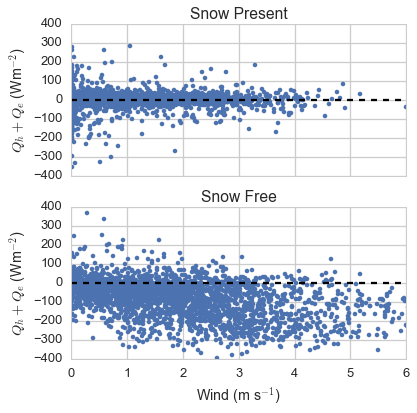

In [26]:
#########
# Net Turbulence vs Bulk Richardson -- All years
fig,axes = plt.subplots(2,1,figsize=(6,6),sharex=True)
Qmin= -400
Qmax = 400

ax = axes[0]
ax.plot(support.WIND.where(support.SP == 1),\
        (support.LatFlux+support.SensFlux).where(support.SP == 1),\
        '.',label='Snow Present')
ax.plot([0,6],[0,0],'k--')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(0,6)
ax.set_title('Snow Present')

ax = axes[1]
ax.plot(support.WIND.where(support.SP == 0),\
        (support.LatFlux+support.SensFlux).where(support.SP == 0),\
        '.',label='Snow Free')
ax.plot([0,6],[0,0],'k--')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('Wind (m s$^{-1}$)')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(0,6)
ax.set_title('Snow Free')

## Selecting data for reasonableness

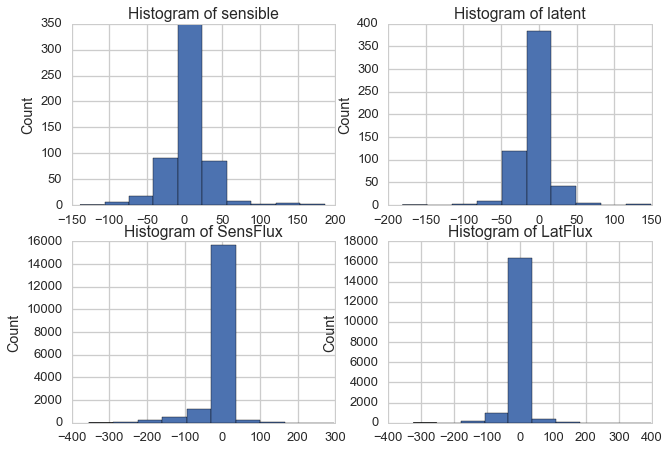

In [27]:
## Select only turbulence data that meets the assumptions for eddy-covariance
ind = np.nonzero ( (support.SP == 1).values &\
                  ~(np.isnan(support.SensFlux)).values &\
                  ~(np.isnan(support.LatFlux)).values &\
                  (support.WIND > 2).values
                  )
snoqTurbObs = xray.Dataset({'sensible' : (['time'], support.SensFlux[ind].values),
                'latent' : (['time'], support.LatFlux[ind].values)},
                coords={'time': support.time[ind]})

fig,axes = plt.subplots(2,2)
axes = axes.flatten()
snoqTurbObs.sensible.plot.hist(ax=axes[0]);
snoqTurbObs.latent.plot.hist(ax=axes[1]);

support.SensFlux.plot.hist(ax=axes[2]);
support.LatFlux.plot.hist(ax=axes[3]);

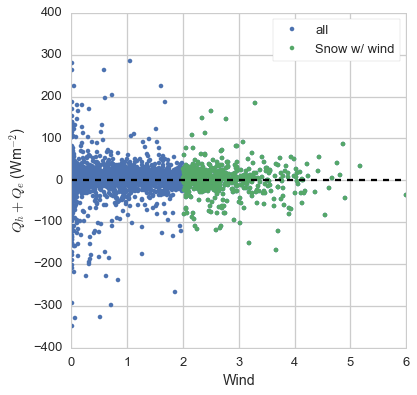

In [28]:
#########
# Net Turbulence vs wind
fig,ax = plt.subplots(1,1,figsize=(6,6))

ax.plot(support.WIND.where(support.SP == 1),(support.LatFlux+support.SensFlux).where(support.SP == 1),'.',label='all')
ax.plot(support.WIND[ind],(support.LatFlux[ind]+support.SensFlux[ind]).where(support.SP[ind] == 1),\
        '.',label='Snow w/ wind')
ax.plot([0,6],[0,0],'k--')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('Wind')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(0,6)
ax.legend(frameon=True)

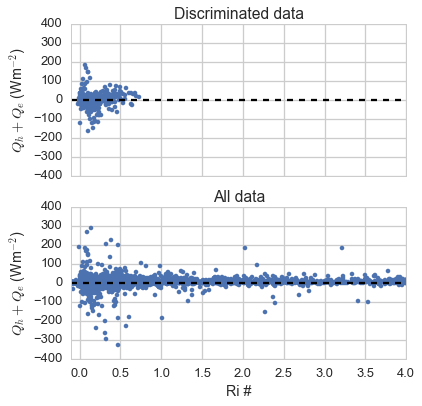

In [29]:
#########
# Net Turbulence vs Bulk Richardson -- All years
mHeight = 6.
Ri = bulkRichardson(support.T6.where(support.SP == 1)+273.15,
                    support.Tsrf.where(support.SP == 1)+273.15,
                    support.WIND.where(support.SP == 1),
                    mHeight- support.Snowdepth.where(support.SP == 1),
                    False)
fig,axes = plt.subplots(2,1,figsize=(6,6),sharex=True)

#########
# Discriminated data
ax = axes.flatten()[0]
ax.plot(Ri[0][ind],(support.LatFlux[ind]+support.SensFlux[ind]).where(support.SP[ind] == 1),'.')
ax.plot([Qmin,Qmax],[0,0],'k--')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)
ax.set_title('Discriminated data')

#########
# All data
ax = axes.flatten()[1]
ax.plot(Ri[0],(support.LatFlux+support.SensFlux).where(support.SP == 1),'.')
ax.plot([Qmin,Qmax],[0,0],'k--')
ax.set_ylabel('$Q_h+Q_e$ (Wm$^{-2}$)')
ax.set_xlabel('Ri #')
ax.set_ylim(Qmin,Qmax)
ax.set_xlim(RiMin,RiMax)
ax.set_title('All data')

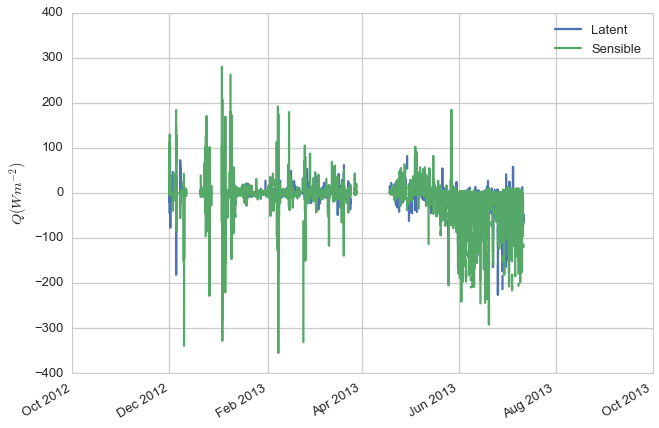

In [30]:
fig,ax = plt.subplots(1,1)
ax.plot(support.time,support.LatFlux,label='Latent')
ax.plot(support.time,support.SensFlux,label='Sensible')
ax.set_ylabel('$Q (Wm^{-2})$')
ax.set_xlim(datetime(2012,10,1),datetime(2013,10,1))
ax.legend()

fig.autofmt_xdate()

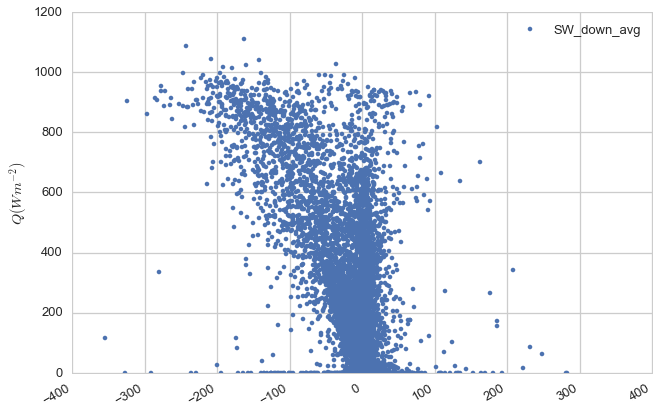

In [31]:
fig,ax = plt.subplots(1,1)
ax.plot(support.SensFlux,support.SW_down_avg,'.')
ax.set_ylabel('$Q (Wm^{-2})$')
ax.set_xlim(-400,400)
ax.legend()

fig.autofmt_xdate()

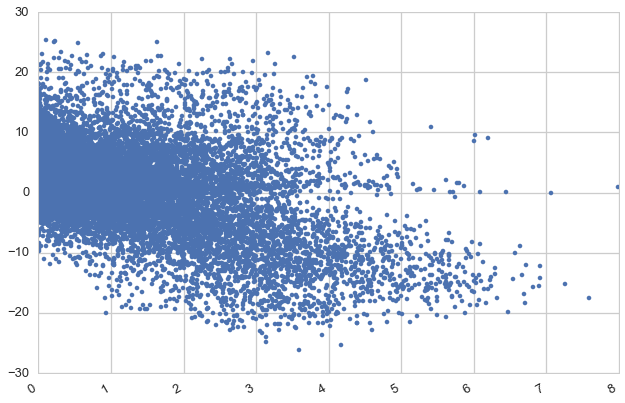

In [38]:
fig,ax = plt.subplots(1,1)
ax.plot(support.WIND,support.T6-support.Tsrf,'.')
# ax.set_ylabel('$Q (Wm^{-2})$')
# ax.set_ylim(-10,20)
# ax.legend()

fig.autofmt_xdate()

### From AMS BL conference
- presenter (session 2a on Monday) shows an S-shape relationship between wind speed and delta-T at 10m. I don't have anything anywhere close to resembling that @ SNQ.

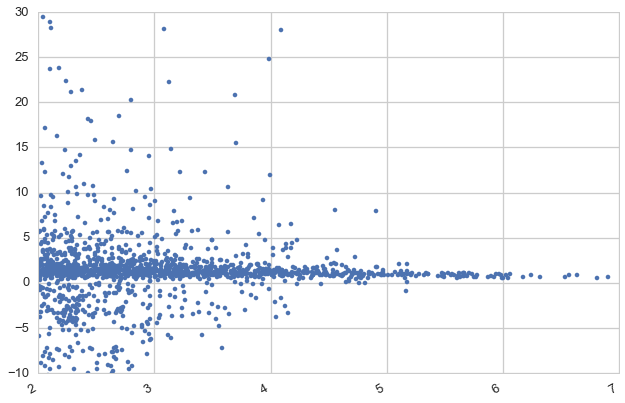

In [41]:
fig,ax = plt.subplots(1,1)
ax.plot(support.WIND.where(support.WIND >= 2),\
        (support.LW_down_avg-support.LW_up_avg).where(support.WIND >= 2) \
        / support.SensFlux.where(support.WIND >= 2),'.')
ax.set_ylim(-10,30)
fig.autofmt_xdate()

### Regimes of SBL
- supposed to be a clear distinction between SBL regimes around 5ish m/s. Not a clear disntinction here...

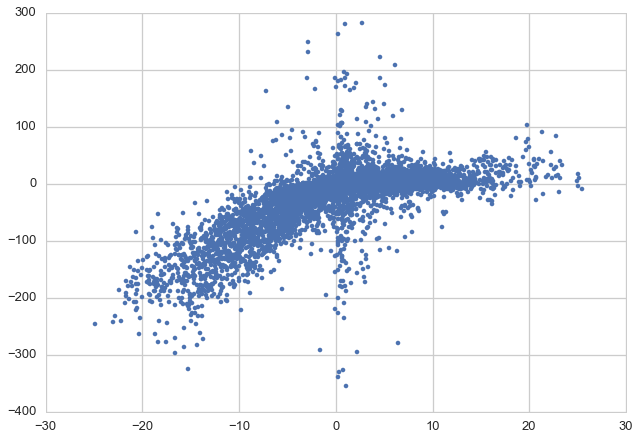

In [43]:
plt.plot(support.T6-support.Tsrf,support.SensFlux,'.')